# Conférences Python Master TIDE #1

## Librairie pandas

Dataset des communes françaises : `correspondance-code-insee-code-postal.csv`

0) Import
- Importer la librairie **pandas**
- Utiliser l'option suivante
```python
pd.set_option("display.min_rows", 16)
```

1) Ecrire une fonction qui charge le fichier CSV
- Uniquement les 11 premières colonnes
- Utiliser la colonne "Code INSEE" comme index
- Trier selon l'index
- Pour vérifier, exécuter les tests unitaires

```python
def lecture_geo():
    pass
```

2) Questions
- Combien y a-t-il de départements ?
- Quelle commune est la plus haute ?
- Quelle commune est la plus peuplée ?
- Quelle commune a le nom le plus court ?
- Quelle commune a le nom le plus long ?
- Quel est le nom de commune le plus fréquent ?
- Ecrire une fonction qui recherche les communes se terminant par un motif du type "-mot1-mot2" (par exemple "-SUR-MER")
```python
def selection(mot1, mot2):
    pass
```
- Quelles villes contiennent deux "Z" (accolés, séparés par une seule lettre, séparés par un nombre quelconque de lettres, séparés par au moins une lettre) ?
- Quelles sont les dix terminaisons des noms de communes du type "-mot1-mot2" les plus fréquentes ?

3) Transformations
- Passer la colonne "Superficie" en km²
- Passer la colonne "Altitude Moyenne" en entiers
- Modifier la colonne "Statut" en categorie ordonnée

4) Géographie
- Créer une colonne "CP Ville" à partir du code postal et du nom de chaque commune
- Extraire la latitude et la longitude de la colonne "geo_point_2d"
- Ecrire une fonction qui retourne le "CP Ville" de la commune la plus proche d'une latitude et d'une longitude
```python
def ville(lat, long):
    pass
```
- Ecrire une fonction qui transforme des coordonnées GPS (en degrés, minutes et secondes) en coordonnées décimales
```python
def gps2dec(deg, mn, sec):
    pass
```
- Choisir une petite commune française sur Wikipédia et vérifier qu'elle est trouvée à partir de ces coordonnnées GPS en utilisant les 2 fonctions définies

5) Géométrie
- Décoder les données JSON de la colonne "geo_shape"
- Donner le décompte des différentes valeurs associées à la clé "type"
- Donner le décompte des longueurs des listes associées à la clé "coordinates"
- Quelles sont les "CP Ville" des communes de type "Polygon" et dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

6) Graphiques
- Afficher un histogramme avec les longueurs des noms des communes
- Afficher un graphique de type scatterplot à partir des coordonnées des communes
- Trouver une condition pour limiter le dataset à la France métropolitaine et afficher un graphique
- Mettre toutes les communes à moins de 1000m en bleu et celle à plus de 1000m en rouge
- Afficher un graphique de type scatterplot dans lequel les communes se terminant par un motif du type "-mot1-mot2" sont mis dans une autre couleur
- Afficher un graphique de type scatterplot dans lequel la couleur utilisée dépend de la colonne "Altitude moyenne" selon la colormap "Spectral_r"
- Afficher une carte de France métropolitaine avec les préfectures de région et leur nom, en corrigeant celles qui sont des arrondissements de Paris, Lyon ou Marseille.

&copy; Francis Wolinski 2025

In [1]:
import pandas as pd

pd.set_option("display.min_rows", 16)

In [2]:
pd.__version__

'2.2.3'

In [3]:
def lecture_geo():
    df = pd.read_csv("data/correspondance-code-insee-code-postal.csv",
                     sep=";",
                     # usecols=["Code INSEE", "Code Postal", "Commune", "Département", "Région", "Statut", "Altitude Moyenne", "Superficie", "Population", "geo_point_2d", "geo_shape"],
                     usecols=range(11),
                     index_col="Code INSEE"
                    )
    df = df.sort_index()
    
    return df

In [4]:
# method chaining

def lecture_geo():
    df = (pd
          .read_csv("data/correspondance-code-insee-code-postal.csv",
                    sep=";",
                    # usecols=["Code INSEE", "Code Postal", "Commune", "Département", "Région", "Statut", "Altitude Moyenne", "Superficie", "Population", "geo_point_2d", "geo_shape"],
                    usecols=range(11),
                    index_col="Code INSEE"
                   )
          .sort_index()
         )
    
    return df

In [5]:
df = lecture_geo()
df

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."
01007,01500,AMBRONAY,AIN,RHONE-ALPES,Commune simple,309.0,3359.0,2.3,"46.0055913782, 5.35760660735","{""type"": ""Polygon"", ""coordinates"": [[[5.413533..."
01008,01500,AMBUTRIX,AIN,RHONE-ALPES,Commune simple,274.0,518.0,0.7,"45.9367134524, 5.3328092349","{""type"": ""Polygon"", ""coordinates"": [[[5.321986..."
01009,01300,ANDERT-ET-CONDON,AIN,RHONE-ALPES,Commune simple,294.0,696.0,0.3,"45.7873565333, 5.65788307924","{""type"": ""Polygon"", ""coordinates"": [[[5.656393..."
...,...,...,...,...,...,...,...,...,...,...


In [6]:
df["Département"].nunique()

101

In [7]:
df.loc[df["Altitude Moyenne"] == df["Altitude Moyenne"].max()]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
73047,73480,BONNEVAL-SUR-ARC,SAVOIE,RHONE-ALPES,Commune simple,2713.0,11231.0,0.2,"45.3858269371, 7.09178979521","{""type"": ""Polygon"", ""coordinates"": [[[7.110695..."


In [8]:
df.loc[df["Altitude Moyenne"].idxmax(), "Commune"]

'BONNEVAL-SUR-ARC'

In [9]:
df.loc[df["Population"].idxmax(), "Commune"]

'TOULOUSE'

In [10]:
df.loc[df["Commune"].str.len().idxmin(), "Commune"]

'Y'

In [11]:
df.loc[df["Commune"].str.len().idxmax(), "Commune"]

'SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON'

In [12]:
df["Commune"].value_counts().index[0]

'SAINTE-COLOMBE'

In [13]:
df["Population"].describe()

count    36742.000000
mean         1.755484
std          8.109130
min          0.000000
25%          0.200000
50%          0.400000
75%          1.100000
max        440.200000
Name: Population, dtype: float64

In [14]:
df["Commune"].describe().loc["top"]

'SAINTE-COLOMBE'

In [15]:
def selection(mot1, mot2):
    # pattern = "-" + mot1 + "-" + mot2
    pattern = f"-{mot1}-{mot2}"  # f-string
    print(pattern)
    selection = df.loc[df["Commune"].str.endswith(pattern), "Commune"]
    return selection

In [16]:
selection("SUR", "MER")

-SUR-MER


Code INSEE
06011         BEAULIEU-SUR-MER
06027           CAGNES-SUR-MER
06138          THEOULE-SUR-MER
06159     VILLEFRANCHE-SUR-MER
13039              FOS-SUR-MER
14059       BENERVILLE-SUR-MER
14062             BENY-SUR-MER
14066        BERNIERES-SUR-MER
                 ...          
85035     BRETIGNOLLES-SUR-MER
85114             JARD-SUR-MER
85127       LONGEVILLE-SUR-MER
85166           OLONNE-SUR-MER
85201    SAINT-BENOIST-SUR-MER
85243             BREM-SUR-MER
85294       LA TRANCHE-SUR-MER
85307         LA FAUTE-SUR-MER
Name: Commune, Length: 100, dtype: object

In [17]:
selection("SOUS", "BOIS")

-SOUS-BOIS


Code INSEE
10136          EGUILLY-SOUS-BOIS
26335           SALLES-SOUS-BOIS
57128      CHARLEVILLE-SOUS-BOIS
60052         BEAUGIES-SOUS-BOIS
62762     SAINT-MICHEL-SOUS-BOIS
78165       LES CLAYES-SOUS-BOIS
89020         ASNIERES-SOUS-BOIS
93005           AULNAY-SOUS-BOIS
93014           CLICHY-SOUS-BOIS
93057    LES PAVILLONS-SOUS-BOIS
93064            ROSNY-SOUS-BOIS
94033         FONTENAY-SOUS-BOIS
95316            JAGNY-SOUS-BOIS
95660        VILLAINES-SOUS-BOIS
Name: Commune, dtype: object

In [18]:
# Quelles villes contiennent deux "Z" (accolés, séparés par une seule lettre, séparés par un nombre quelconque de lettres, séparés par au moins une lettre) ?
# 2 Z accolés
df.loc[df["Commune"].str.contains("ZZ"), "Commune"]

Code INSEE
2A027              AZZANA
2A099             COZZANO
2A118             FOZZANO
2A259               REZZA
2A336    VALLE-DI-MEZZANA
2B143        LINGUIZZETTA
2B147               LOZZI
2B149       LUGO-DI-NAZZA
2B157             MAZZOLA
2B164    MONACIA-D'OREZZA
2B216            PIAZZALI
2B217            PIAZZOLE
2B222        PIE-D'OREZZA
2B236     POGGIO-DI-NAZZA
2B242      POGGIO-MEZZANA
2B291            STAZZONA
2B338      VALLE-D'OREZZA
2B347             VEZZANI
68030       BERGHOLTZZELL
Name: Commune, dtype: object

In [19]:
# 2 Z séparés par une seule lettre
df.loc[df["Commune"].str.contains("Z.Z"), "Commune"]

Code INSEE
2A363                   ZOZA
43261               VEZEZOUX
71174    DEZIZE-LES-MARANGES
Name: Commune, dtype: object

In [20]:
# 2 Z séparés par un nombre quelconque de lettres
df.loc[df["Commune"].str.contains("Z.*Z"), "Commune"]

Code INSEE
07161      MONTPEZAT-SOUS-BAUZON
09105         DAUMAZAN-SUR-ARIZE
09167             LEZAT-SUR-LEZE
11034           BELVEZE-DU-RAZES
11228        MAZEROLLES-DU-RAZES
11417         VILLARZEL-DU-RAZES
12294          VEZINS-DE-LEVEZOU
16378                TAIZE-AIZIE
                  ...           
69229    SAINT-NIZIER-D'AZERGUES
71174        DEZIZE-LES-MARANGES
74310            VIUZ-LA-CHIESAZ
74311             VIUZ-EN-SALLAZ
78337              LIMETZ-VILLEZ
88404        ROZIERES-SUR-MOUZON
95282                 GOUZANGREZ
97608                   DZAOUDZI
Name: Commune, Length: 67, dtype: object

In [21]:
# séparés par au moins une lettre
df.loc[df["Commune"].str.contains("Z.+Z"), "Commune"]

Code INSEE
07161       MONTPEZAT-SOUS-BAUZON
09105          DAUMAZAN-SUR-ARIZE
09167              LEZAT-SUR-LEZE
11034            BELVEZE-DU-RAZES
11228         MAZEROLLES-DU-RAZES
11417          VILLARZEL-DU-RAZES
12294           VEZINS-DE-LEVEZOU
16378                 TAIZE-AIZIE
29008            BEUZEC-CAP-SIZUN
29176             PLONEVEZ-PORZAY
2A026              AZILONE-AMPAZA
2A362                       ZONZA
2A363                        ZOZA
31245               JUZET-D'IZAUT
34069         CAZOULS-LES-BEZIERS
34279    SAINT-NAZAIRE-DE-LADAREZ
34280      SAINT-NAZAIRE-DE-PEZAN
34310          THEZAN-LES-BEZIERS
42193             ROZIER-EN-DONZY
43131             MAZERAT-AUROUZE
43261                    VEZEZOUX
45026        BAZOCHES-SUR-LE-BETZ
45204          MEZIERES-LEZ-CLERY
45245          OUZOUER-SUR-TREZEE
47006          ALLEZ-ET-CAZENEUVE
54129           CIREY-SUR-VEZOUZE
54161         DOMEVRE-SUR-VEZOUZE
55024      AZANNES-ET-SOUMAZANNES
55178          ERIZE-SAINT-DIZIER
560

In [22]:
df["Superficie"] /= 100

df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [23]:
df["Altitude Moyenne"] = df["Altitude Moyenne"].astype(int)

df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [24]:
df["Statut"].unique()

array(['Commune simple', 'Chef-lieu canton', 'Sous-préfecture',
       'Préfecture', 'Préfecture de région', "Capitale d'état"],
      dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  int64  
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.1+ MB


In [26]:
cat_statut = pd.CategoricalDtype(categories=['Commune simple', 'Chef-lieu canton', 'Sous-préfecture', 'Préfecture', 'Préfecture de région', "Capitale d'état"],
                                 ordered=True)
df["Statut"] = df["Statut"].astype(cat_statut)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int64   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 3.8+ MB


In [27]:
df["Statut"].cat.codes

Code INSEE
01001    0
01002    0
01004    1
01005    0
01006    0
01007    0
01008    0
01009    0
        ..
97610    1
97611    2
97612    1
97613    1
97614    1
97615    1
97616    1
97617    1
Length: 36742, dtype: int8

In [28]:
df["Statut"]

Code INSEE
01001      Commune simple
01002      Commune simple
01004    Chef-lieu canton
01005      Commune simple
01006      Commune simple
01007      Commune simple
01008      Commune simple
01009      Commune simple
               ...       
97610    Chef-lieu canton
97611     Sous-préfecture
97612    Chef-lieu canton
97613    Chef-lieu canton
97614    Chef-lieu canton
97615    Chef-lieu canton
97616    Chef-lieu canton
97617    Chef-lieu canton
Name: Statut, Length: 36742, dtype: category
Categories (6, object): ['Commune simple' < 'Chef-lieu canton' < 'Sous-préfecture' < 'Préfecture' < 'Préfecture de région' < 'Capitale d'état']

In [29]:
df["CP Ville"] = df["Code Postal"] + " " + df["Commune"]

df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,CP Ville
Code INSEE,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",01400 L'ABERGEMENT-CLEMENCIAT
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",01640 L'ABERGEMENT-DE-VAREY
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",01500 AMBERIEU-EN-BUGEY
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",01330 AMBERIEUX-EN-DOMBES
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",01300 AMBLEON


In [30]:
df["geo_point_2d"].iloc[0].split(", ")

['46.1534255214', '4.92611354223']

In [31]:
# latitude
df["geo_point_2d"].apply(lambda x: x.split(", ")[0]).astype(float)
# longitude
df["geo_point_2d"].apply(lambda x: x.split(", ")[1]).astype(float)

Code INSEE
01001     4.926114
01002     5.428017
01004     5.372926
01005     4.912273
01006     5.594320
01007     5.357607
01008     5.332809
01009     5.657883
           ...    
97610    45.186999
97611    45.193246
97612    45.073680
97613    45.087170
97614    45.137910
97615    45.284206
97616    45.118550
97617    45.134428
Name: geo_point_2d, Length: 36742, dtype: float64

In [32]:
df[["Latitude", "Longitude"]] = df["geo_point_2d"].str.extract(r"(.*), (.*)").astype(float)

df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,CP Ville,Latitude,Longitude
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",01400 L'ABERGEMENT-CLEMENCIAT,46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",01640 L'ABERGEMENT-DE-VAREY,46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",01500 AMBERIEU-EN-BUGEY,45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",01330 AMBERIEUX-EN-DOMBES,45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",01300 AMBLEON,45.749499,5.594320


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int64   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
 10  CP Ville          36742 non-null  object  
 11  Latitude          36742 non-null  float64 
 12  Longitude         36742 non-null  float64 
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 4.7+ MB


In [34]:
import numpy as np

def ville(lat, long):
    dist = np.sqrt((df["Latitude"] - lat)**2 + (df["Longitude"] - long)**2)
    return df.loc[dist.idxmin(), "CP Ville"]

In [35]:
def ville2(lat, long):
    dist2 = (df["Latitude"] - lat)**2 + (df["Longitude"] - long)**2
    return df.loc[dist2.idxmin(), "CP Ville"]

In [36]:
df.loc[df["Commune"].str.contains("Z.*Z"), "Commune"]

Code INSEE
07161      MONTPEZAT-SOUS-BAUZON
09105         DAUMAZAN-SUR-ARIZE
09167             LEZAT-SUR-LEZE
11034           BELVEZE-DU-RAZES
11228        MAZEROLLES-DU-RAZES
11417         VILLARZEL-DU-RAZES
12294          VEZINS-DE-LEVEZOU
16378                TAIZE-AIZIE
                  ...           
69229    SAINT-NIZIER-D'AZERGUES
71174        DEZIZE-LES-MARANGES
74310            VIUZ-LA-CHIESAZ
74311             VIUZ-EN-SALLAZ
78337              LIMETZ-VILLEZ
88404        ROZIERES-SUR-MOUZON
95282                 GOUZANGREZ
97608                   DZAOUDZI
Name: Commune, Length: 67, dtype: object

In [37]:
def gps2dec(deg, mn, sec):
    return deg + mn/60 + sec/3600

In [38]:
# 49° 48′ 14″ nord, 2° 59′ 34″ est
ville(gps2dec(49, 48, 14), gps2dec(2, 59, 34))

'80190 Y'

In [39]:
# 43° 29′ 38″ nord, 3° 26′ 16″ est
ville(gps2dec(43, 29, 38), gps2dec(3, 26, 16))

'34120 LEZIGNAN-LA-CEBE'

In [40]:
# 43° 29′ 38″ nord, 3° 26′ 16″ est
ville2(gps2dec(43, 29, 38), gps2dec(3, 26, 16))

'34120 LEZIGNAN-LA-CEBE'

In [41]:
df["geo_shape"].iloc[0]

'{"type": "Polygon", "coordinates": [[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.157977074275074], [4.904571300671208, 46.16096059498421], [4.910603091203733, 46.180432597608316], [4.914119126867876, 46.18271538441311], [4.932895432675545, 46.18304616431434], [4.938729478686701, 46.17383114520867], [4.933038591703602, 46.16429901579509], [4.958286230120842, 46.153246666893935], [4.943330383388636, 46.145964148557894], [4.939154593056283, 46.12938048470421], [4.931056072485923, 46.12087123131487], [4.92627342692396, 46.1200517234555]]]}'

In [42]:
import json

json.loads(df["geo_shape"].iloc[0])

{'type': 'Polygon',
 'coordinates': [[[4.92627342692396, 46.1200517234555],
   [4.92199538031264, 46.12069170563269],
   [4.921996260482057, 46.12663667307488],
   [4.90936269187648, 46.129164756530656],
   [4.916016986429157, 46.14461766984426],
   [4.903080786126749, 46.157977074275074],
   [4.904571300671208, 46.16096059498421],
   [4.910603091203733, 46.180432597608316],
   [4.914119126867876, 46.18271538441311],
   [4.932895432675545, 46.18304616431434],
   [4.938729478686701, 46.17383114520867],
   [4.933038591703602, 46.16429901579509],
   [4.958286230120842, 46.153246666893935],
   [4.943330383388636, 46.145964148557894],
   [4.939154593056283, 46.12938048470421],
   [4.931056072485923, 46.12087123131487],
   [4.92627342692396, 46.1200517234555]]]}

In [43]:
geo_shape = df["geo_shape"].apply(json.loads)
geo_shape.iloc[0]["type"]

'Polygon'

In [49]:
geo_shape.apply(lambda d: d["type"]).value_counts()

geo_shape
Polygon         36670
MultiPolygon       72
Name: count, dtype: int64

In [52]:
geo_shape.apply(lambda d: len(d["coordinates"])).value_counts()

geo_shape
1    36660
2       80
3        1
4        1
Name: count, dtype: int64

In [55]:
df.loc[geo_shape.apply(lambda d: len(d["coordinates"])).idxmax(), "CP Ville"]

'83400 HYERES'

In [58]:
df.loc[(geo_shape.apply(lambda d: d["type"]) == "Polygon") & (geo_shape.apply(lambda d: len(d["coordinates"])) == 2), "CP Ville"]

Code INSEE
02232               02600 COYOLLES
05052               05600 EYGLIERS
09042    09240 LA BASTIDE-DE-SEROU
22209              22650 PLOUBALAY
2A272                20100 SARTENE
2B049              20214 CALENZANA
48080               48300 LANGOGNE
67486              67920 SUNDHOUSE
68078              68420 EGUISHEIM
71028            71270 BEAUVERNOIS
Name: CP Ville, dtype: object

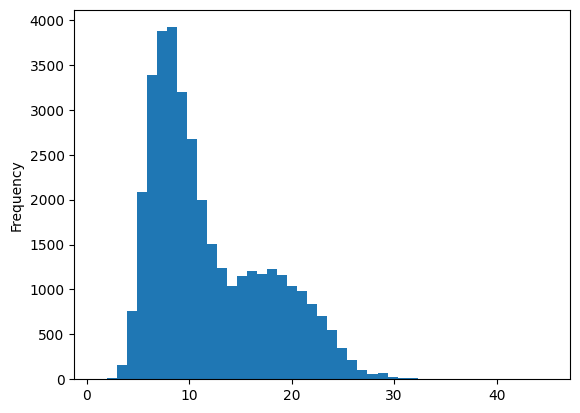

In [65]:
ax = df["Commune"].str.len().plot.hist(bins=45)  # ou bien ;

In [71]:
df["longueur"] = df["Commune"].str.len()
df["compose"] = df["Commune"].str.contains(r"\W")
df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,CP Ville,Latitude,Longitude,longueur,compose
Code INSEE,,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",01400 L'ABERGEMENT-CLEMENCIAT,46.153426,4.926114,23,True
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",01640 L'ABERGEMENT-DE-VAREY,46.009188,5.428017,21,True
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",01500 AMBERIEU-EN-BUGEY,45.960848,5.372926,17,True
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",01330 AMBERIEUX-EN-DOMBES,45.996180,4.912273,19,True
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",01300 AMBLEON,45.749499,5.594320,7,False


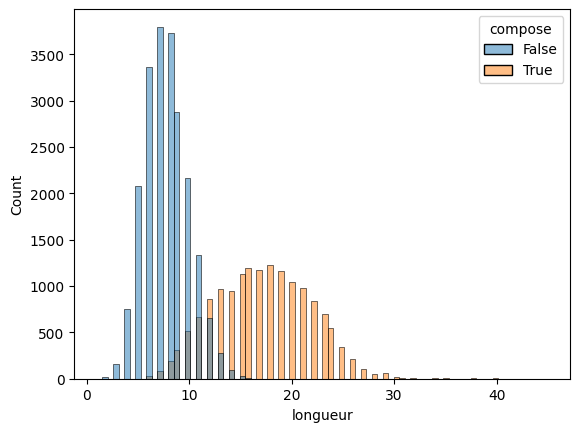

In [70]:
import seaborn as sns

sns.histplot(data=df, x="longueur", hue="compose");

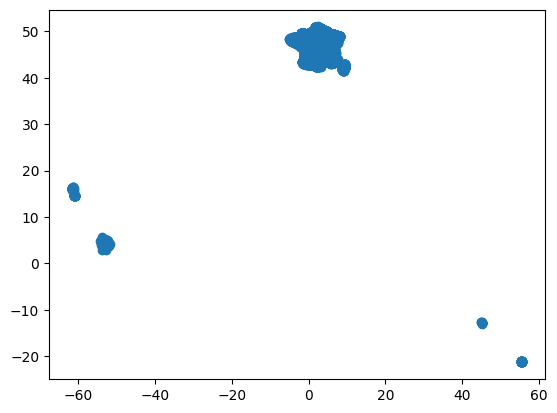

In [74]:
import matplotlib.pyplot as plt

plt.scatter(df["Longitude"], df["Latitude"]);

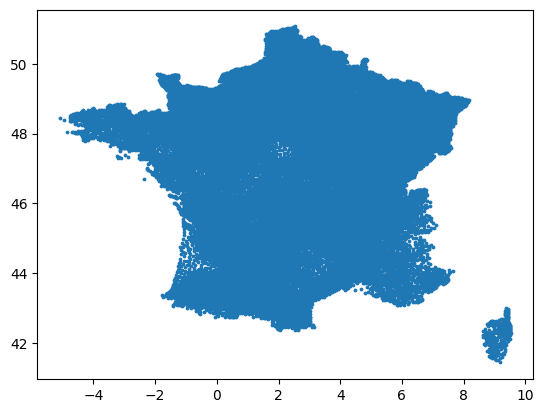

In [76]:
metro = df.loc[df["Latitude"] > 40]
plt.scatter(metro["Longitude"], metro["Latitude"], s=3);

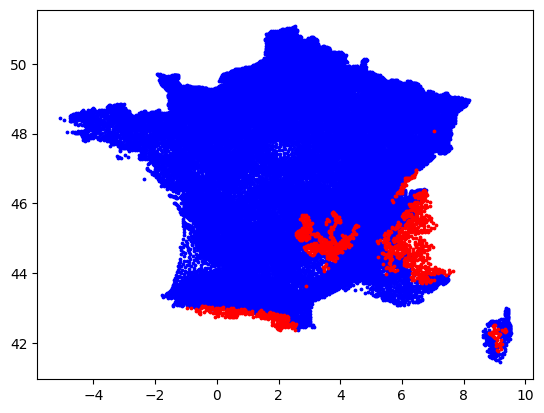

In [83]:
fig, ax = plt.subplots()
metro = metro.sort_values("Altitude Moyenne")
metro1 = metro.loc[metro["Altitude Moyenne"] < 1000]
ax.scatter(metro1["Longitude"], metro1["Latitude"], s=3, c="b")
metro2 = metro.loc[metro["Altitude Moyenne"] >= 1000]
ax.scatter(metro2["Longitude"], metro2["Latitude"], s=3, c="r");

In [86]:
def display(mot1, mot2):
    pattern = f"-{mot1}-{mot2}"  # f-string
    selection = metro.loc[metro["Commune"].str.endswith(pattern)]
    fig, ax = plt.subplots()
    ax.scatter(metro["Longitude"], metro["Latitude"], s=3, c="lightgrey")
    ax.scatter(selection["Longitude"], selection["Latitude"], s=3, c="lightgreen")

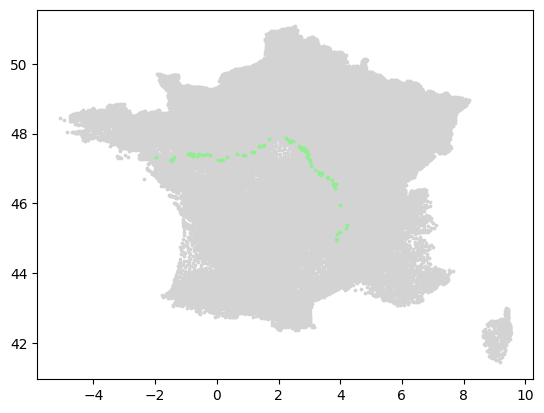

In [90]:
display("SUR", "LOIRE")

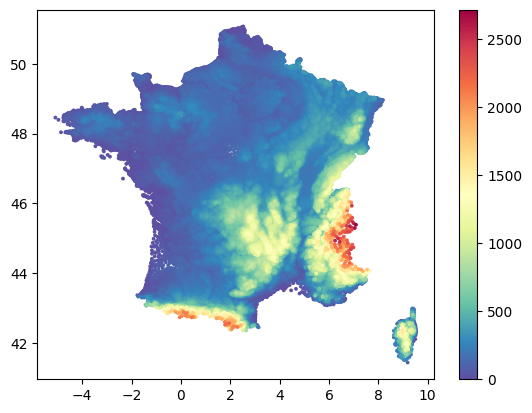

In [95]:
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            s=3,
            c=metro["Altitude Moyenne"],
            cmap="Spectral_r")
plt.colorbar();

### Tests

In [45]:
# tests unitaires de la fonction lecture_geo

import unittest

class Session1Test(unittest.TestCase):
    """
    Tests unitaires du chargement du fichier :
    correspondance-code-insee-code-postal.csv
    """
        
    def test_1_dataframe(self):
        df = lecture_geo()
        self.assertTrue(isinstance(df, pd.DataFrame))
        
    def test_2_columns(self):
        df = lecture_geo()
        self.assertEqual(len(df.columns), 10)
        
    def test_3_index(self):
        df = lecture_geo()
        self.assertTrue(isinstance(df.index, pd.Index))
        
    def test_4_index_name(self):
        df = lecture_geo()
        self.assertEqual(df.index.name, "Code INSEE")
        
    def test_5_index_sort(self):
        df = lecture_geo()
        self.assertEqual(df.index.min(), df.index[0])
        self.assertEqual(df.index.max(), df.index[-1])

In [46]:
# fonction run_tests
def run_tests():
    test_suite = unittest.TestLoader().loadTestsFromTestCase(Session1Test)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(test_suite)

In [47]:
# run tests
run_tests()

test_1_dataframe (__main__.Session1Test.test_1_dataframe) ... ok
test_2_columns (__main__.Session1Test.test_2_columns) ... ok
test_3_index (__main__.Session1Test.test_3_index) ... ok
test_4_index_name (__main__.Session1Test.test_4_index_name) ... ok
test_5_index_sort (__main__.Session1Test.test_5_index_sort) ... ok

----------------------------------------------------------------------
Ran 5 tests in 1.411s

OK
